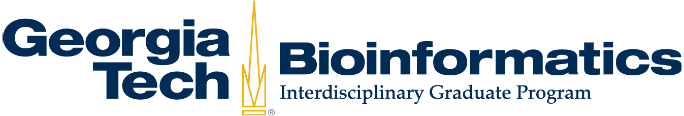

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>Shivam Sharma (shivamsharma13@gatech.edu), Nilavrah Sensarma (nsensarma3@gatech.edu), Bengy Gyimah-Asamoah, (bgyimaha3@gatech.edu)

</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 7 (Ploygenic Risk Scores) starter notebook</h2>
    <h3>Deadline: 11:59PM, November 11th, 2023</h3>
</div>

<div class="alert alert-block alert-danger">
    <h2>Alert!</h2>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

---

# **1. Knowing your data**
### *Total Questions: 5*
### *Total Points: 2+2+3+3+10 = 20*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Your Phenotype and Population of interest</h3>
    <p>Your group will select a 1000 Genome continental population and a disease/trait of interest.</p>
</div>

<div class="alert alert-block alert-success">
    <h3>Response 1.1</h3> 
    <p>Our disease of interest is: coronary artery disease and our population of interest is: African </p>
</div>

<div class="alert alert-block alert-warning">
    <h3>1.2 Check source VCF file</h3>
    <p>Show that you can access these VCF files. Show the first 10 variant IDs from chromosome 15.</p>
</div>

In [3]:
#ls -lh the 1000 genomes source files
!ls -lh /storage/ice-shared/biol6150/Data/1000Genomes/ 

total 15G
-rw-r--r--. 1 ssharma454 gtperson 742M Oct 25 10:20 phase3.chr10.GRCh38.GT.crossmap.vcf.gz
-rw-r--r--. 1 ssharma454 gtperson 123K Oct 26 16:30 phase3.chr10.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r--. 1 ssharma454 gtperson 736M Oct 25 10:20 phase3.chr11.GRCh38.GT.crossmap.vcf.gz
-rw-r--r--. 1 ssharma454 gtperson 123K Oct 25 10:30 phase3.chr11.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r--. 1 ssharma454 gtperson 711M Oct 25 10:20 phase3.chr12.GRCh38.GT.crossmap.vcf.gz
-rw-r--r--. 1 ssharma454 gtperson 122K Oct 26 16:42 phase3.chr12.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r--. 1 ssharma454 gtperson 534M Oct 25 10:20 phase3.chr13.GRCh38.GT.crossmap.vcf.gz
-rw-r--r--. 1 ssharma454 gtperson  90K Oct 26 16:41 phase3.chr13.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r--. 1 ssharma454 gtperson 482M Oct 25 10:20 phase3.chr14.GRCh38.GT.crossmap.vcf.gz
-rw-r--r--. 1 ssharma454 gtperson  84K Oct 26 16:41 phase3.chr14.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r--. 1 ssharma454 gtperson 439M Oct 25 10:20 phase3.c

In [4]:
#Show the first 10 variant IDs from chromosome 15. You bash command goes here.
!bcftools view /storage/ice-shared/biol6150/Data/1000Genomes/phase3.chr15.GRCh38.GT.crossmap.vcf.gz | grep -v "^##" | cut -f3 | head -10

ID
rs371549847
rs565090028
rs201219124
rs373298708
rs560310552
rs552896638
rs542841371
rs561207761
rs531597354
^C


<div class="alert alert-block alert-warning">
    <h3>1.3 How many samples are present in these set of VCF files</h3>
    <p>You can do this using a series of bash commands, or a tool of your choice. But you have to show how you got the total number. You don't have to run this on all VCF files. Just one will work.</p>
</div>

In [11]:
#Get the samples present in the VCF file.
!bcftools query -l /storage/ice-shared/biol6150/Data/1000Genomes/phase3.chr15.GRCh38.GT.crossmap.vcf.gz | sort | uniq | wc -l

2504


<div class="alert alert-block alert-warning">
    <h3>1.4 How many variants are present in chromosome 12 VCF file</h3>
    <p>Use a tools or a bash command. Up to you.</p>
</div>

In [2]:
#Your command for getting the number of variants here.
!bcftools stats /storage/ice-shared/biol6150/Data/1000Genomes/phase3.chr12.GRCh38.GT.crossmap.vcf.gz | grep "number of records"

#   number of records   .. number of data rows in the VCF
SN	0	number of records:	3885458


<div class="alert alert-block alert-warning">
    <h3>1.5 Extract the samples of interest</h3>
    <p>You have source 1000 genomes files and a continental population of interest.</p>
    <p><b>1.5.1</b> Write the population codes that come from the continental population of interest</p>
    <p><b>1.5.2</b> Extract the samples that come from the selected continental population. The final output will be a set of 22 VCF GZ files that have a fraction of total samples present in the source VCF file. <b>Show and briefly explain any helper files you have used for this step.</b></p>
    <p><b>1.5.3</b> How many samples are present in your final VCF file?</p>
</div>

#Write the 3 letter codes of the populations of interest.
![Assigned Individual](resim1.png)

#Write the 3 letter codes of the populations of interest.
![Assigned Individual](resim2.png)

In [4]:
#Write the commands used for extraction.
import subprocess

vcf_dir = "/storage/ice-shared/biol6150/Data/1000Genomes/"
output_dir = "/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/"

chromosomes = [f"phase3.chr{i}.GRCh38.GT.crossmap.vcf.gz" for i in range(1, 23)]
afr_population_codes = ["ACB", "GWD", "ESN", "MSL", "YRI", "LWK", "ASW"]
sample_file = "african_samples.txt"  

for chrom in chromosomes:
    input_vcf = vcf_dir + chrom
    output_vcf = output_dir + f"AFR_{chrom}"
    
    subprocess.run([
        "bcftools", "view", "-S", sample_file, "-Oz", "-o", output_vcf, input_vcf
    ])

    print(f"Extracted samples for {chrom} into {output_vcf}")


Extracted samples for phase3.chr1.GRCh38.GT.crossmap.vcf.gz into /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr1.GRCh38.GT.crossmap.vcf.gz
Extracted samples for phase3.chr2.GRCh38.GT.crossmap.vcf.gz into /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr2.GRCh38.GT.crossmap.vcf.gz
Extracted samples for phase3.chr3.GRCh38.GT.crossmap.vcf.gz into /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr3.GRCh38.GT.crossmap.vcf.gz
Extracted samples for phase3.chr4.GRCh38.GT.crossmap.vcf.gz into /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr4.GRCh38.GT.crossmap.vcf.gz
Extracted samples for phase3.chr5.GRCh38.GT.crossmap.vcf.gz into /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr5.GRCh38.GT.crossmap.vcf.gz
Extracted samples for phase3.chr6.GRCh38.GT.crossmap.vcf.gz into /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project

In [17]:
import subprocess

vcf_dir = "/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/"
vcf_files = [f"AFR_phase3.chr{i}.GRCh38.GT.crossmap.vcf.gz" for i in range(1, 23)]
unique_samples = set()

for vcf_file in vcf_files:
    vcf_path = vcf_dir + "/" + vcf_file  

    try:
        result = subprocess.run(
            ["bcftools", "query", "-l", vcf_path], 
            capture_output=True, text=True, check=True
        )
        
        sample_ids = result.stdout.splitlines()
        unique_samples.update(sample_ids)
    
    except Exception as e:
        print(f"An error occurred while processing {vcf_file}: {e}")

num_unique_samples = len(unique_samples)
print(f"Total number of unique samples: {num_unique_samples}")

with open("unique_samples.txt", "w") as f:
    for sample in unique_samples:
        f.write(f"{sample}\n")

Total number of unique samples: 661


# **2. PGS catalog**
### *Total Questions: 1*
### *Total Points: 20*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Select a PGS summary stat file</h3>
    <p>Go to PGS Catalog and find a summary statistics that is relevant to the continental population of interest and the disease assigned to you.</p>
    <p><b>2.1.1</b> Talk about why you selected this PGS file. (1-3 lines)</p>
    <p><b>2.1.2</b> Write the PGP and PGS website links for the files selected.</p>
    <p><b>2.1.3</b> Can you find the train and test sizes used in the publication? What was the distribtion (by continental ancestry; eg: European, African, EastAsian, etc.) for the samples used in training?</p>
</div>

#All answers go here. 1-3 lines in general for each.

2.1.1 I selected PGS004696 because it focuses on coronary artery disease, which is a highly relevant health condition in African populations. This polygenic score was developed using multi-ancestry data, including a substantial percentage of individuals of African ancestry, making it more applicable for studying genetic risk factors in this population. The inclusion of diverse ancestries ensures broader applicability and potential accuracy in risk prediction.

2.1.2 PGS Link: https://www.pgscatalog.org/score/PGS004696/
      PGP Link: https://www.pgscatalog.org/publication/PGP000602/

2.1.3 

## Train and Test Sizes and Ancestry Distribution:

The publication associated with PGS004696 (Smith JL et al., Circ Genom Precis Med, 2024) mentions a total of 87,724 individuals used in the training phase of polygenic score development, with the following ancestry distribution:

European: 64.2%
African: 19.4%
Hispanic or Latin American: 11.4%
Multi-ancestry (excluding European): 5%
(including East Asian and South Asian populations)

## For the GWAS phase, 1,093,078 individuals were involved, with the following distribution:

European: 70.7%
East Asian: 19.4%
African: 7%
Hispanic or Latin American: 2.8%

## For evlauation

European: 20%
East Asian: 20%
African: 20%
Hispanic or Latin American: 20%
South Asian: 20%

# **3. Polygenic risk scores**
### *Total Questions: 3*
### *Total Points: 15+30+15 = 60*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Harmonize the variant IDs between your VCF file and the PGS summary stat file</h3>
    <p>Variants are identified in a variety of ways (dbSNP) being one of them. It's a good idea to have one single VCF file and a single summary stat file.<b>Hint:</b> This might be a good time to convert your VCF files to a Plink2 format (makes things easier and faster)</p>
    <hr>
    <p><b>Question:</b> Write the % of variants present in the summary stat that are also present in your VCF file? Mention <b>total n</b> and <b>overlapping n.</b></p>
</div>

In [19]:
# PLINK2 Download code

import subprocess


create_env_command = "conda create -n myenv plink2 -c bioconda -y"
subprocess.run(create_env_command, shell=True)

activate_env_command = "source activate myenv"
subprocess.run(activate_env_command, shell=True)

verify_command = "plink2 --version"
subprocess.run(verify_command, shell=True)



Channels:
 - bioconda
 - defaults
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /home/hice1/imusayeva3/.conda/envs/myenv

  added / updated specs:
    - plink2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          46 KB
    libopenblas-0.3.21         |       h043d6bf_0         5.4 MB
    nomkl-3.0                  |                0          46 KB
    openblas-0.3.21            |       h06a4308_0          12 KB
    openblas-devel-0.3.21      |       h06a4308_0          81 KB
    plink2-2.00a2.3            |       hb2a7ceb_2         6.9 MB  bioconda
    ------------------------------------------------------------
                                           Total:        12.4 MB

The following NEW packages will be INSTALLED:

  _libgcc_mutex      pkgs/main/linux-64::_libgcc_mutex-0.1

CompletedProcess(args='plink2 --version', returncode=0)

In [20]:
#Put all the code and comments here.
import subprocess

vcf_dir = "/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/"
vcf_files = [f"AFR_phase3.chr{i}.GRCh38.GT.crossmap.vcf.gz" for i in range(1, 23)]
output_dir = "/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/"

for vcf_file in vcf_files:
    vcf_path = vcf_dir + vcf_file
    output_prefix = output_dir + vcf_file.replace(".vcf.gz", "_plink2")
    
    subprocess.run([
        "plink2", "--vcf", vcf_path, "--make-pgen", "--out", output_prefix
    ])
    
    print(f"Converted {vcf_file} to Plink2 format.")


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr1.GRCh38.GT.crossmap_plink2.log.
Options in effect:
  --make-pgen
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr1.GRCh38.GT.crossmap_plink2
  --vcf /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr1.GRCh38.GT.crossmap.vcf.gz

Start time: Sun Nov  3 13:24:40 2024
772152 MiB RAM detected, ~743102 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
--vcf: 6470222 variants scanned.
--vcf: 6422k variants converted.
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr1.GRCh38.GT.crossmap_plink2-temporary.pgen
+
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr1.GRCh38.GT.crossmap_plink2-te

... 1010111112121313141415151616171718181919202021212222232324242525262627272828292930303131323233333434353536363737383839394040414142424343444445454646474748484949505051515252535354545555565657575858595960606161626263636464656566666767686869697070717172727373747475757676777778787979808081818282838384848585868687878888898990909191929293939494959596969797989899done.
Writing
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr4.GRCh38.GT.crossmap_plink2.pgen
... 10111213141517181920212223252627282930313334353637383940424344454647485051525354555658596061626364666768697071727375767778798081838485868788899192939495969799done.
End time: Sun Nov  3 13:29:48 2024
Converted AFR_phase3.chr4.GRCh38.GT.crossmap.vcf.gz to Plink2 format.
PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/A

--vcf: 4062699 variants scanned.
--vcf: 3997k variants converted.
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr11.GRCh38.GT.crossmap_plink2-temporary.pgen
+
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr11.GRCh38.GT.crossmap_plink2-temporary.pvar.zst
+
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr11.GRCh38.GT.crossmap_plink2-temporary.psam
written.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr11.GRCh38.GT.crossmap_plink2-temporary.psam.
4062699 variants loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr11.GRCh38.GT.crossmap_plink2-temporary.pvar.zst.
Note: No phenotype data present.
Writing
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr11.GRCh38.GT.crossmap_plink2.psam
... done.
Writing
/home/hic

... 1010111112121313141415151616171718181919202021212222232324252526262727282829293030313132323333343435353636373738383939404041414242434344444545464647474848495050515152525353545455555656575758585959606061616262636364646565666667676868696970707171727273737475757676777778787979808081818282838384848585868687878888898990909191929293939494959596969797989899done.
Writing
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr14.GRCh38.GT.crossmap_plink2.pgen
... 121417192224272932343639414446495154565961646668717376788183868891939698done.
End time: Sun Nov  3 13:38:05 2024
Converted AFR_phase3.chr14.GRCh38.GT.crossmap.vcf.gz to Plink2 format.
PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr15.GRCh38.GT.crossmap_plink2.log.
Options in effect:
  --make-pgen
  --out /h

--vcf: 2277169 variants scanned.
--vcf: 2228k variants converted.
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr18.GRCh38.GT.crossmap_plink2-temporary.pgen
+
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr18.GRCh38.GT.crossmap_plink2-temporary.pvar.zst
+
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr18.GRCh38.GT.crossmap_plink2-temporary.psam
written.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr18.GRCh38.GT.crossmap_plink2-temporary.psam.
2277169 variants loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr18.GRCh38.GT.crossmap_plink2-temporary.pvar.zst.
Note: No phenotype data present.
Writing
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr18.GRCh38.GT.crossmap_plink2.psam
... done.
Writing
/home/hic

... 1010111112121313141415151616171718181919202021212222232324252526262727282829293030313132323333343435353636373738383939404041414242434344444545464647474848495050515152525353545455555656575758585959606061616262636364646565666667676868696970707171727273737475757676777778787979808081818282838384848585868687878888898990909191929293939494959596969797989899done.
Writing
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr21.GRCh38.GT.crossmap_plink2.pgen
... 111723293541475359647076828894done.
End time: Sun Nov  3 13:41:01 2024
Converted AFR_phase3.chr21.GRCh38.GT.crossmap.vcf.gz to Plink2 format.
PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr22.GRCh38.GT.crossmap_plink2.log.
Options in effect:
  --make-pgen
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmi

In [21]:
#Download PGS score table
import subprocess

pgs_url = "https://ftp.ebi.ac.uk/pub/databases/spot/pgs/scores/PGS004696/ScoringFiles/Harmonized/PGS004696_hmPOS_GRCh38.txt.gz"

output_file = "/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PGS004696_hmPOS_GRCh38.txt.gz"

subprocess.run(["wget", pgs_url, "-O", output_file])

print(f"Downloaded PGS file to {output_file}")


--2024-11-03 13:46:39--  https://ftp.ebi.ac.uk/pub/databases/spot/pgs/scores/PGS004696/ScoringFiles/Harmonized/PGS004696_hmPOS_GRCh38.txt.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27053322 (26M) [application/x-gzip]
Saving to: ‘/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PGS004696_hmPOS_GRCh38.txt.gz’

     0K .......... .......... .......... .......... ..........  0%  177K 2m29s
    50K .......... .......... .......... .......... ..........  0% 1.25M 85s
   100K .......... .......... .......... .......... ..........  0%  904K 66s
   150K .......... .......... .......... .......... ..........  0% 1.29M 54s
   200K .......... .......... .......... .......... ..........  0%  909K 49s
   250K .......... .......... .......... .......... ..........  1% 38.2M 41s
   300K .......... .......... .......... .......... .....

Downloaded PGS file to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PGS004696_hmPOS_GRCh38.txt.gz


 .......... 52% 1.22M 1s
 13900K .......... .......... .......... .......... .......... 52% 37.7M 1s
 13950K .......... .......... .......... .......... .......... 52% 34.2M 1s
 14000K .......... .......... .......... .......... .......... 53% 37.3M 1s
 14050K .......... .......... .......... .......... .......... 53% 36.8M 1s
 14100K .......... .......... .......... .......... .......... 53% 32.5M 1s
 14150K .......... .......... .......... .......... .......... 53% 37.2M 1s
 14200K .......... .......... .......... .......... .......... 53% 32.9M 1s
 14250K .......... .......... .......... .......... .......... 54% 37.4M 1s
 14300K .......... .......... .......... .......... .......... 54% 53.2M 1s
 14350K .......... .......... .......... .......... .......... 54% 46.8M 1s
 14400K .......... .......... .......... .......... .......... 54% 53.6M 1s
 14450K .......... .......... .......... .......... .......... 54% 47.5M 1s
 14500K .......... .......... .......... .......... .......... 

In [7]:
#extract rsid from score table
import pandas as pd
import gzip

pgs_file = "/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PGS004696_hmPOS_GRCh38.txt.gz"

with gzip.open(pgs_file, 'rt', encoding='ISO-8859-1') as f:
    pgs_data = pd.read_csv(f, sep='\t', comment='#', on_bad_lines='skip', low_memory=False)

rs_ids = pgs_data['rsID'].dropna()

output_file = "/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/pgs_rsIDs.txt"
rs_ids.to_csv(output_file, index=False, header=False)

print(f"rsID column extracted and saved to {output_file}")


rsID column extracted and saved to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/pgs_rsIDs.txt


In [9]:
#Find overlapping regions and fractions of overlapped regions
import subprocess
import os

plink_dir = "/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/"
pgs_rsIDs_file = os.path.join(plink_dir, "pgs_rsIDs.txt")

total_pgs_variants = 0
total_vcf_variants = 0
total_overlapping_variants = 0

for chrom in range(1, 23):
    plink_file_prefix = os.path.join(plink_dir, f"AFR_phase3.chr{chrom}.GRCh38.GT.crossmap_plink2")
    output_prefix = os.path.join(plink_dir, f"filtered_variants_chr{chrom}")

    plink_command = [
        "plink2",
        "--pfile", plink_file_prefix,
        "--extract", pgs_rsIDs_file,
        "--make-bed",
        "--out", output_prefix
    ]

    subprocess.run(plink_command, check=True)

    log_file = output_prefix + ".log"
    with open(log_file, 'r') as f:
        for line in f:
            if "variants loaded from" in line:
                vcf_variants = int(line.split()[0])
                total_vcf_variants += vcf_variants
            elif "--extract:" in line:
                pgs_variants = int(line.split()[1])
                total_pgs_variants += pgs_variants
            elif "variants remaining after main filters" in line:
                overlapping_variants = int(line.split()[0])
                total_overlapping_variants += overlapping_variants

overlap_percentage = (total_overlapping_variants / total_pgs_variants) * 100 if total_pgs_variants > 0 else 0

print(f"Total variants in PGS file: {total_pgs_variants}")
print(f"Total variants in VCF files: {total_vcf_variants}")
print(f"Overlapping variants: {total_overlapping_variants}")
print(f"Percentage of overlapping variants: {overlap_percentage:.2f}%")


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/filtered_variants_chr1.log.
Options in effect:
  --extract /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/pgs_rsIDs.txt
  --make-bed
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/filtered_variants_chr1
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr1.GRCh38.GT.crossmap_plink2

Start time: Sun Nov  3 17:10:28 2024
772152 MiB RAM detected, ~741422 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr1.GRCh38.GT.crossmap_plink2.psam.
6470222 variants loaded from
/home/hice1/imusayeva3/biol61

... 101113141516171820212324252627293031333435363839404243454647484950515253545556575859616263646566686970717374757778798182848586888990929395969799done.
End time: Sun Nov  3 17:10:48 2024
PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/filtered_variants_chr6.log.
Options in effect:
  --extract /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/pgs_rsIDs.txt
  --make-bed
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/filtered_variants_chr6
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr6.GRCh38.GT.crossmap_plink2

Start time: Sun Nov  3 17:10:48 2024
772152 MiB RAM detected, ~741379 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founde

... 11121416182021222426282931323335363840414244464749505354555759606264656769707274757778808183858788909294969899done.
End time: Sun Nov  3 17:11:05 2024
PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/filtered_variants_chr11.log.
Options in effect:
  --extract /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/pgs_rsIDs.txt
  --make-bed
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/filtered_variants_chr11
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr11.GRCh38.GT.crossmap_plink2

Start time: Sun Nov  3 17:11:05 2024
772152 MiB RAM detected, ~741352 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imu

... 101317202225273032353841444750525558616466687174767981848791939699done.
End time: Sun Nov  3 17:11:17 2024
PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/filtered_variants_chr16.log.
Options in effect:
  --extract /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/pgs_rsIDs.txt
  --make-bed
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/filtered_variants_chr16
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr16.GRCh38.GT.crossmap_plink2

Start time: Sun Nov  3 17:11:17 2024
772152 MiB RAM detected, ~741310 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/P

PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/filtered_variants_chr21.log.
Options in effect:
  --extract /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/pgs_rsIDs.txt
  --make-bed
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/filtered_variants_chr21
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr21.GRCh38.GT.crossmap_plink2

Start time: Sun Nov  3 17:11:26 2024
772152 MiB RAM detected, ~741315 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr21.GRCh38.GT.crossmap_plink2.psam.
1110588 variants loaded from
/home/hice1/imusayeva3/bi

![Assigned Individual](resim5.png)

![Assigned Individual](resim4.png)

<div class="alert alert-block alert-warning">
    <h3>3.2 Calculate polygenic risk scores</h3>
    <p>Calculate the polygenic risk scores (for the disease of interest) for all the individuals belonging to the continental population of interest</p>
    <p>Please use Plink2 for calculating polygenic risk scores here (although more sophisticated tools exist and can be used in your own research)</p>
</div>

In [15]:
###All the work here.
import pandas as pd
import gzip
import os
import subprocess

file_path = "/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PGS004696_hmPOS_GRCh38.txt.gz"

with gzip.open(file_path, 'rt') as f:
    df = pd.read_csv(f, sep='\t', comment='#')

print("Data successfully loaded, first 5 rows:")
print(df.head())

if 'rsID' in df.columns and 'effect_allele' in df.columns and 'effect_weight' in df.columns:
    print("Required columns found.")
else:
    print("Required columns are missing!")

pfile_dir = "/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7"
output_dir = os.path.join(pfile_dir, "PRS_results")
os.makedirs(output_dir, exist_ok=True)

score_file_path = os.path.join(output_dir, "processed_PGS_scores.txt")
df[['rsID', 'effect_allele', 'effect_weight']].to_csv(score_file_path, sep='\t', index=False)

for chr in range(1, 23):
    pfile = f"{pfile_dir}/AFR_phase3.chr{chr}.GRCh38.GT.crossmap_plink2"
    output_file = f"{output_dir}/PRS_chr{chr}"    
    cmd = [
        "plink2",
        "--pfile", pfile,
        "--score", score_file_path, "1", "2", "3", "header",
        "--out", output_file
    ]
    subprocess.run(cmd)

output_profile = os.path.join(output_dir, "PRS_all_chromosomes.profile")
cmd_merge = f"cat {output_dir}/PRS_chr*.profile > {output_profile}"
subprocess.run(cmd_merge, shell=True)

print("Polygenic Risk Score (PRS) calculations completed for all chromosomes.")



/scratch/906392/ipykernel_2503007/2731661990.py:12: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, sep='\t', comment='#')


Data successfully loaded, first 5 rows:
         rsID  chr_name  chr_position effect_allele other_allele  \
0   rs3131972         1        752721             A            G   
1   rs3131969         1        754182             A            G   
2   rs1048488         1        760912             T            C   
3  rs12562034         1        768448             A            G   
4   rs4040617         1        779322             A            G   

   effect_weight hm_source     hm_rsID hm_chr    hm_pos  hm_inferOtherAllele  
0      -0.000079   ENSEMBL   rs3131972    1.0  817341.0                  NaN  
1      -0.000177   ENSEMBL   rs3131969    1.0  818802.0                  NaN  
2       0.000141   ENSEMBL   rs1048488    1.0  825532.0                  NaN  
3       0.000034   ENSEMBL  rs12562034    1.0  833068.0                  NaN  
4       0.000719   ENSEMBL   rs4040617    1.0  843942.0                  NaN  
Required columns found.
PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.co

and 174 were skipped due to mismatching allele codes.
(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


--score: 107725 variants processed.
--score: Results written to
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr1.sscore
.
End time: Sun Nov  3 18:18:44 2024
PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr2.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr2
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr2.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:18:44 2024
772152 MiB RAM detected, ~740729 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 6

and 7 were skipped due to mismatching allele codes.
(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


--score: 108297 variants processed.
--score: Results written to
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr2.sscore
.
End time: Sun Nov  3 18:18:50 2024
PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr3.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr3
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr3.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:18:50 2024
772152 MiB RAM detected, ~740706 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 6

(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr4.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr4
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr4.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:18:56 2024
772152 MiB RAM detected, ~739714 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr4.GRCh38.GT.crossmap_plink2.psam.
5758667 variants loaded from
/home/hice1/

(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr5.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr5
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr5.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:01 2024
772152 MiB RAM detected, ~740321 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr5.GRCh38.GT.crossmap_plink2.psam.
5289469 variants loaded from
/home/hice1/

(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr6.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr6
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr6.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:05 2024
772152 MiB RAM detected, ~739682 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr6.GRCh38.GT.crossmap_plink2.psam.
5045711 variants loaded from
/home/hice1/

and 41 were skipped due to mismatching allele codes.
(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr7.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr7
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr7.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:09 2024
772152 MiB RAM detected, ~740464 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr7.GRCh38.GT.crossmap_plink2.psam.
4727043 variants loaded from
/home/hice1/

(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr8.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr8
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr8.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:14 2024
772152 MiB RAM detected, ~739022 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr8.GRCh38.GT.crossmap_plink2.psam.
4614906 variants loaded from
/home/hice1/

and 2 were skipped due to mismatching allele codes.
(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr9.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr9
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr9.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:17 2024
772152 MiB RAM detected, ~740398 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr9.GRCh38.GT.crossmap_plink2.psam.
3574859 variants loaded from
/home/hice1/

and 5 were skipped due to mismatching allele codes.
(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


--score: 58615 variants processed.
--score: Results written to
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr9.sscore
.
End time: Sun Nov  3 18:19:21 2024
PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr10.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr10
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr10.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:21 2024
772152 MiB RAM detected, ~740677 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males,

and 255 were skipped due to mismatching allele codes.
(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr11.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr11
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr11.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:24 2024
772152 MiB RAM detected, ~740036 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr11.GRCh38.GT.crossmap_plink2.psam.
4062699 variants loaded from
/home/hi

and 55 were skipped due to mismatching allele codes.
(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


--score: 65869 variants processed.
--score: Results written to
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr11.sscore
.
End time: Sun Nov  3 18:19:28 2024
PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr12.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr12
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr12.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:28 2024
772152 MiB RAM detected, ~740647 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males

and 9 were skipped due to mismatching allele codes.
(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


--score: 62912 variants processed.
--score: Results written to
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr12.sscore
.
End time: Sun Nov  3 18:19:31 2024
PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr13.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr13
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr13.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:31 2024
772152 MiB RAM detected, ~740643 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males

(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr14.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr14
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr14.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:34 2024
772152 MiB RAM detected, ~740637 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr14.GRCh38.GT.crossmap_plink2.psam.
2660432 variants loaded from
/home/hi

(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr15.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr15
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr15.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:36 2024
772152 MiB RAM detected, ~740634 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr15.GRCh38.GT.crossmap_plink2.psam.
2434859 variants loaded from
/home/hi

and 188 were skipped due to mismatching allele codes.
(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr16.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr16
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr16.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:38 2024
772152 MiB RAM detected, ~740631 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr16.GRCh38.GT.crossmap_plink2.psam.
2711552 variants loaded from
/home/hi

(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr17.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr17
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr17.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:41 2024
772152 MiB RAM detected, ~740626 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr17.GRCh38.GT.crossmap_plink2.psam.
2336515 variants loaded from
/home/hi

and 1 was skipped due to a mismatching allele code.
(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr18.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr18
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr18.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:43 2024
772152 MiB RAM detected, ~740622 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr18.GRCh38.GT.crossmap_plink2.psam.
2277169 variants loaded from
/home/hi

(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr19.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr19
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr19.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:45 2024
772152 MiB RAM detected, ~740610 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr19.GRCh38.GT.crossmap_plink2.psam.
1837486 variants loaded from
/home/hi

(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr20.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr20
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr20.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:47 2024
772152 MiB RAM detected, ~740607 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr20.GRCh38.GT.crossmap_plink2.psam.
1820333 variants loaded from
/home/hi

(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr21.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr21
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr21.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:48 2024
772152 MiB RAM detected, ~740536 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr21.GRCh38.GT.crossmap_plink2.psam.
1110588 variants loaded from
/home/hi

(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr22.log.
Options in effect:
  --out /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr22
  --pfile /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr22.GRCh38.GT.crossmap_plink2
  --score /home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/processed_PGS_scores.txt 1 2 3 header

Start time: Sun Nov  3 18:19:49 2024
772152 MiB RAM detected, ~740631 available; reserving 386076 MiB for main
workspace.
Using 1 compute thread.
661 samples (0 females, 0 males, 661 ambiguous; 661 founders) loaded from
/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/AFR_phase3.chr22.GRCh38.GT.crossmap_plink2.psam.
1105650 variants loaded from
/home/hi

(Add the 'list-variants' modifier to see which variants were actually used for
scoring.)
cat: '/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results/PRS_chr*.profile': No such file or directory


In [17]:
#Show the scores file in the end.
import os
import pandas as pd

pfile_dir = "/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7"
output_dir = os.path.join(pfile_dir, "PRS_results")

for chr in range(1, 23):
    score_file = os.path.join(output_dir, f"PRS_chr{chr}.sscore")    
    if os.path.exists(score_file):
        try:
            df = pd.read_csv(score_file, sep='\t', nrows=10)
            print(f"\nFirst 10 rows of PRS_chr{chr}.sscore:")
            print(df.head(10))
        except Exception as e:
            print(f"Error reading PRS_chr{chr}.sscore: {e}")
    else:
        print(f"PRS_chr{chr}.sscore file does not exist.")




First 10 rows of PRS_chr1.sscore:
      #IID  ALLELE_CT  NAMED_ALLELE_DOSAGE_SUM    SCORE1_AVG
0  HG01879     215450                   100013  1.033460e-06
1  HG01880     215450                   100649  1.668650e-06
2  HG01882     215450                   100046  1.230750e-06
3  HG01883     215450                    99910  4.345470e-07
4  HG01885     215450                   100201  5.787840e-07
5  HG01886     215450                    99995  8.939310e-07
6  HG01889     215450                    99785  1.259880e-06
7  HG01890     215450                    99944  7.977710e-07
8  HG01894     215450                   100261  1.042430e-06
9  HG01896     215450                    99723  1.198980e-06

First 10 rows of PRS_chr2.sscore:
      #IID  ALLELE_CT  NAMED_ALLELE_DOSAGE_SUM    SCORE1_AVG
0  HG01879     216594                   103344 -1.365850e-06
1  HG01880     216594                   103776 -7.475580e-07
2  HG01882     216594                   102886 -8.831600e-07
3  HG01883     

In [7]:
import os
import pandas as pd

# Directory paths
pfile_dir = "/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7"
output_dir = os.path.join(pfile_dir, "PRS_results")

# Load population data with specified column names
pop_file = os.path.join(pfile_dir, "kgp3_id_pop.tsv")
pop_df = pd.read_csv(pop_file, sep='\t', names=["id", "pop"], header=0)  

# Iterate over chromosome files and merge with population data
for chr in range(1, 23):
    score_file = os.path.join(output_dir, f"PRS_chr{chr}.sscore")
    
    if os.path.exists(score_file):
        try:
            score_df = pd.read_csv(score_file, sep='\t')            
            merged_df = score_df.merge(pop_df, left_on='#IID', right_on='id', how='left')            
            print(f"\nFirst 10 rows of merged PRS_chr{chr}.sscore with population info:")
            print(merged_df.head(10))            
            merged_file_path = os.path.join(output_dir, f"PRS_chr{chr}_with_pop.sscore")
            merged_df.to_csv(merged_file_path, sep='\t', index=False)
            
        except Exception as e:
            print(f"Error processing PRS_chr{chr}.sscore: {e}")
    else:
        print(f"PRS_chr{chr}.sscore file does not exist.")




First 10 rows of merged PRS_chr1.sscore with population info:
      #IID  ALLELE_CT  NAMED_ALLELE_DOSAGE_SUM    SCORE1_AVG       id  pop
0  HG01879     215450                   100013  1.033460e-06  HG01879  ACB
1  HG01880     215450                   100649  1.668650e-06  HG01880  ACB
2  HG01882     215450                   100046  1.230750e-06  HG01882  ACB
3  HG01883     215450                    99910  4.345470e-07  HG01883  ACB
4  HG01885     215450                   100201  5.787840e-07  HG01885  ACB
5  HG01886     215450                    99995  8.939310e-07  HG01886  ACB
6  HG01889     215450                    99785  1.259880e-06  HG01889  ACB
7  HG01890     215450                    99944  7.977710e-07  HG01890  ACB
8  HG01894     215450                   100261  1.042430e-06  HG01894  ACB
9  HG01896     215450                    99723  1.198980e-06  HG01896  ACB

First 10 rows of merged PRS_chr2.sscore with population info:
      #IID  ALLELE_CT  NAMED_ALLELE_DOSAGE_SUM   

<div class="alert alert-block alert-warning">
    <h3>3.3 Visualize the scores by populations in the continental population of interest</h3>
    <p>You might want to scale the scores and use boxplots (or anything else you think that looks good).</p>
</div>

/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


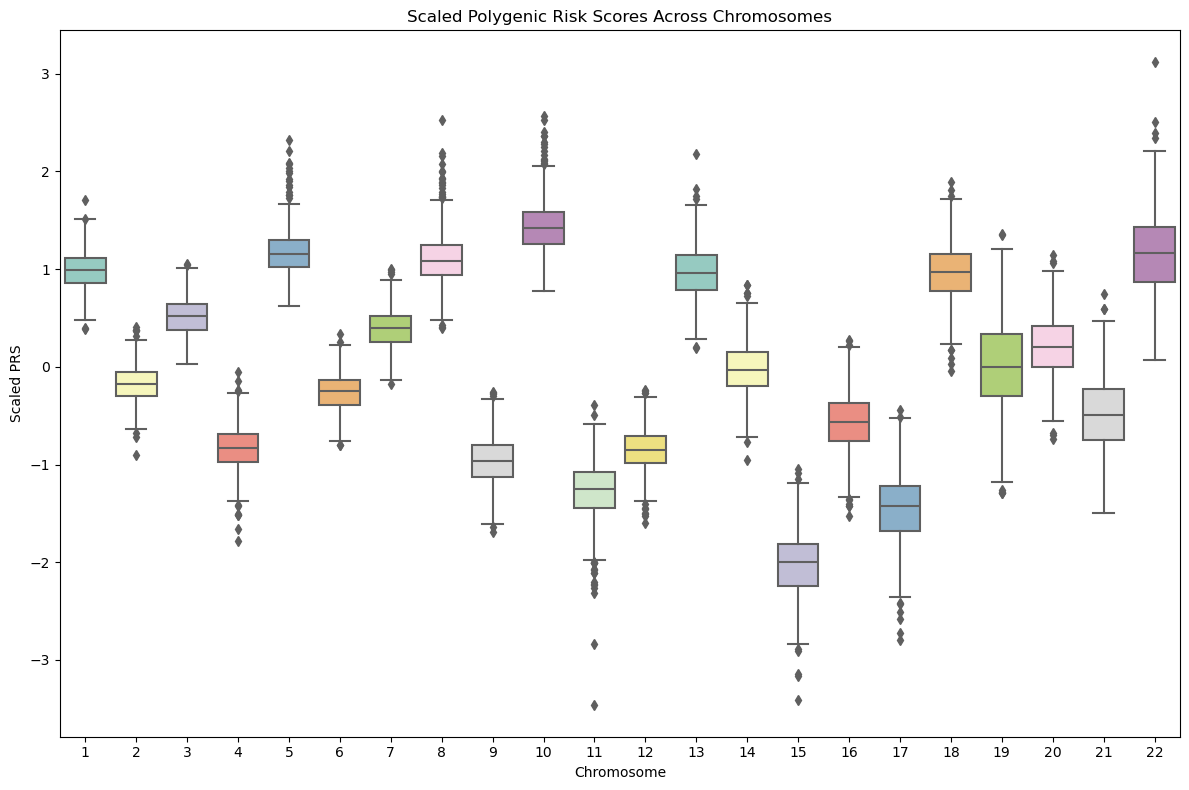

In [22]:
# Plots go here
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pfile_dir = "/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7"
output_dir = os.path.join(pfile_dir, "PRS_results")
all_scores = []

for chr in range(1, 23):
    score_file = os.path.join(output_dir, f"PRS_chr{chr}.sscore")    
    if os.path.exists(score_file):
        try:
            df_score = pd.read_csv(score_file, sep='\t')
            
            df_score.rename(columns={'SCORE1_AVG': 'SCORE'}, inplace=True)
            
            df_score['Chromosome'] = chr
            all_scores.append(df_score)            
        except Exception as e:
            print(f"Error reading PRS_chr{chr}.sscore: {e}")
    else:
        print(f"PRS_chr{chr}.sscore file does not exist.")

df_all_scores = pd.concat(all_scores)
df_all_scores['SCORE_scaled'] = (df_all_scores['SCORE'] - df_all_scores['SCORE'].mean()) / df_all_scores['SCORE'].std()
plt.figure(figsize=(12, 8))
sns.boxplot(x='Chromosome', y='SCORE_scaled', data=df_all_scores, palette="Set3")
plt.title('Scaled Polygenic Risk Scores Across Chromosomes')
plt.xlabel('Chromosome')
plt.ylabel('Scaled PRS')
plt.tight_layout()
plt.show()

/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_ol

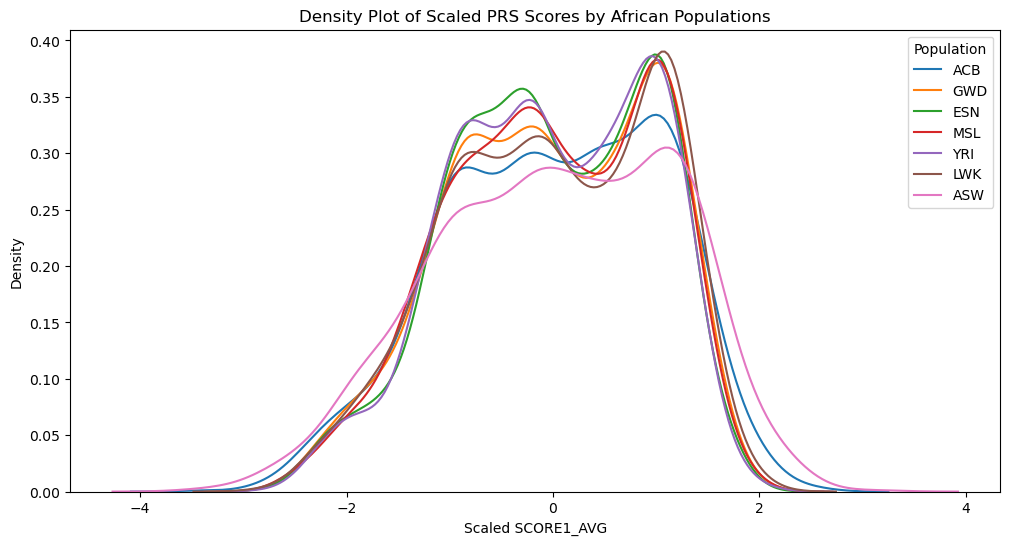

/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


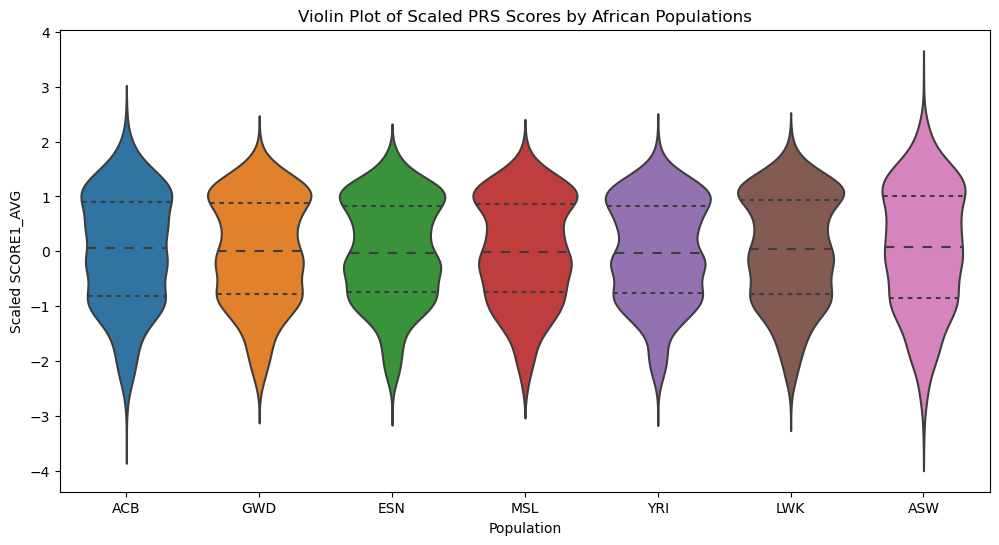

In [17]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Directory paths
pfile_dir = "/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7/PRS_results"

# Define African populations of interest
afr_population_codes = ["ACB", "GWD", "ESN", "MSL", "YRI", "LWK", "ASW"]

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

# Load and concatenate all chromosome score files with population info
for chr in range(1, 23):
    score_file = os.path.join(pfile_dir, f"PRS_chr{chr}_with_pop.sscore")
    
    if os.path.exists(score_file):
        df = pd.read_csv(score_file, sep='\t')        
        df = df[df['pop'].isin(afr_population_codes)]       
        all_data = pd.concat([all_data, df], ignore_index=True)
    else:
        print(f"File {score_file} does not exist.")

if all_data.empty:
    print("No data available for the selected African populations.")
else:
    scaler = StandardScaler()
    all_data['SCORE1_AVG_SCALED'] = scaler.fit_transform(all_data[['SCORE1_AVG']])
    
    
# Density Plot for each population (after scaling)
plt.figure(figsize=(12, 6))
for pop in afr_population_codes:
    sns.kdeplot(all_data[all_data['pop'] == pop]['SCORE1_AVG_SCALED'], label=pop)
plt.title('Density Plot of Scaled PRS Scores by African Populations')
plt.xlabel('Scaled SCORE1_AVG')
plt.legend(title="Population")
plt.show()

# Violin Plot for scaled scores
plt.figure(figsize=(12, 6))
sns.violinplot(data=all_data, x='pop', y='SCORE1_AVG_SCALED', inner='quartile')
plt.title('Violin Plot of Scaled PRS Scores by African Populations')
plt.xlabel('Population')
plt.ylabel('Scaled SCORE1_AVG')
plt.show()



/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


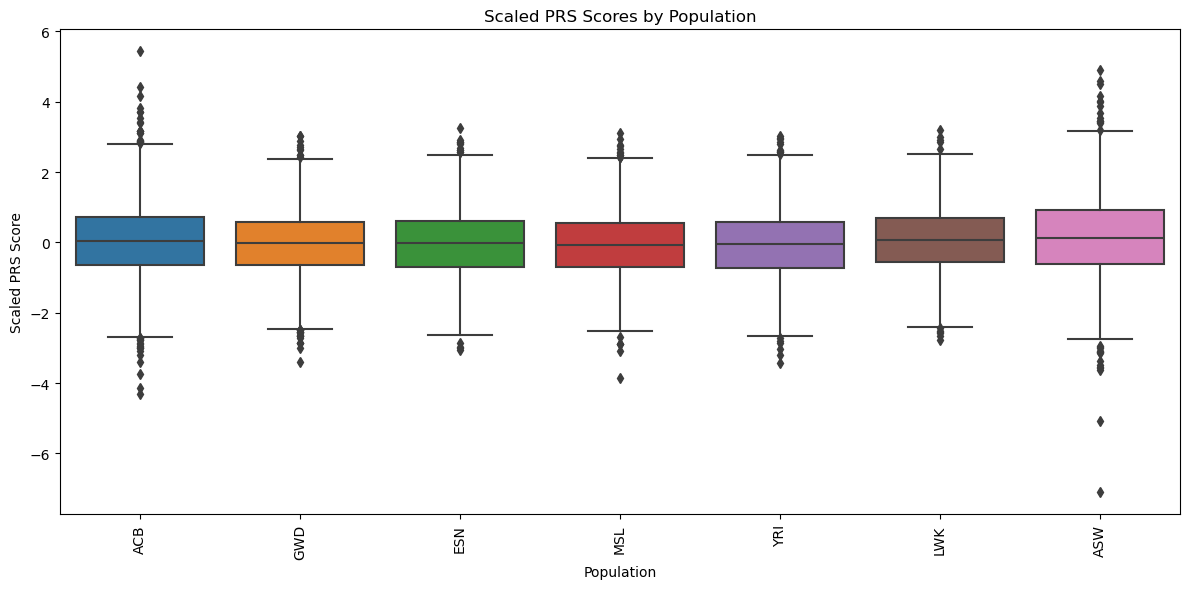

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Directory paths
pfile_dir = "/home/hice1/imusayeva3/biol6150/ProjectSubmissions/Group6/Project7"
output_dir = os.path.join(pfile_dir, "PRS_results")

# Load population data
pop_file = os.path.join(pfile_dir, "kgp3_id_pop.tsv")
pop_df = pd.read_csv(pop_file, sep='\t', names=["id", "pop"], header=0)

# Initialize a list to collect all merged dataframes
all_data = []

# Iterate over chromosome files and merge with population data
for chr in range(1, 23):
    score_file = os.path.join(output_dir, f"PRS_chr{chr}.sscore")
    
    if os.path.exists(score_file):
        try:
            # Load the score file
            score_df = pd.read_csv(score_file, sep='\t')
            
            # Merge with population data
            merged_df = score_df.merge(pop_df, left_on='#IID', right_on='id', how='left')
            
            # Add chromosome information and append to the list
            merged_df['chromosome'] = chr
            all_data.append(merged_df[['#IID', 'SCORE1_AVG', 'pop', 'chromosome']])  # Updated to 'SCORE1_AVG'

        except Exception as e:
            print(f"Error processing PRS_chr{chr}.sscore: {e}")
    else:
        print(f"PRS_chr{chr}.sscore file does not exist.")

if all_data:
    full_df = pd.concat(all_data)
    scaler = StandardScaler()
    full_df['scaled_score'] = full_df.groupby('chromosome')['SCORE1_AVG'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='pop', y='scaled_score', data=full_df)
    plt.xticks(rotation=90)
    plt.title("Scaled PRS Scores by Population")
    plt.xlabel("Population")
    plt.ylabel("Scaled PRS Score")
    plt.tight_layout()
    plt.show()
else:
    print("No valid data to concatenate. Please check the score files for 'SCORE1_AVG' column availability.")
    
